In [37]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, roc_auc_score

## Create Data

In [3]:
X, y = make_classification(n_classes=2, n_features=20, n_samples=1000, random_state=42)
X.shape

(1000, 20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

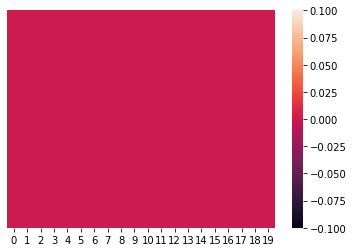

In [15]:
sns.heatmap(np.isnan(X), yticklabels=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

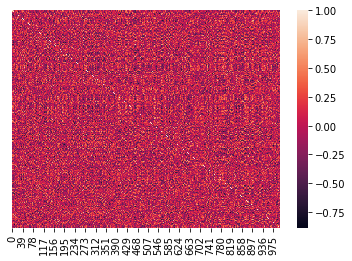

In [17]:
sns.heatmap(np.corrcoef(X), yticklabels=False)

In [5]:
X[:2]

array([[-0.6693561 , -1.49577819, -0.87076638,  1.14183093,  0.02160555,
         1.73062972, -1.25169805,  0.28930464,  0.35716259, -0.19681112,
         0.82927369,  0.15485045, -0.21997009, -0.73913656,  1.80201193,
         1.63460551, -0.93817985, -1.26733697, -1.2763343 ,  1.01664321],
       [ 0.09337237,  0.78584826,  0.10575379,  1.2723535 , -0.84631598,
        -0.97909326,  1.26370668,  0.26402008,  2.41167668, -0.9600463 ,
         0.54347938,  0.19981043,  0.28872366,  0.7324921 , -0.87200205,
        -1.65488744, -1.13020372, -0.12270893,  0.6934308 ,  0.91136272]])

<IPython.core.display.Javascript object>

C:\Users\595244\Anaconda3\envs\krish_env_new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

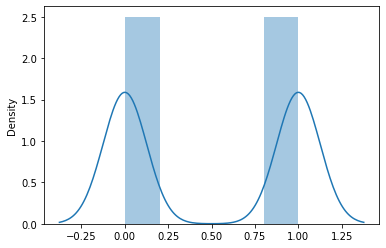

In [7]:
sns.distplot(y)

In [8]:
np.unique(y)

<IPython.core.display.Javascript object>

array([0, 1])

In [9]:
np.bincount(y)

<IPython.core.display.Javascript object>

array([500, 500], dtype=int64)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Use Two models

In [19]:
lr_model = LogisticRegression()
kn_model = KNeighborsClassifier()

In [21]:
%%time
lr_model.fit(X_train, y_train)

Wall time: 8 ms


LogisticRegression()

In [22]:
%%time
kn_model.fit(X_train, y_train)

Wall time: 7 ms


KNeighborsClassifier()

In [23]:
pred_prob_lr = lr_model.predict_proba(X_test)

In [24]:
pred_prob_kn = kn_model.predict_proba(X_test)

In [26]:
?roc_curve

Signature:
roc_curve(
    y_true,
    y_score,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC)

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------

y_true : array, shape = [n_samples]
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : array, shape = [n_samples]
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).

pos_label : int or str, default=None
    The label of the positive class.
    When ``pos_label=None``, if y_true is in {-1, 1} or {0, 1},
    ``pos_label`` is set to 1, otherwise an error will be raised.

sample_weight : array-like of shape (n_samples,), default=None
 

In [29]:
y_test.shape, pred_prob_lr.shape

((200,), (200, 2))

### roc_curve for models

In [31]:
fpr_lr, tpr_lr, th_lr = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)

In [33]:
fpr_kn, tpr_kn, th_kn = roc_curve(y_test, pred_prob_kn[:,1], pos_label=1)

In [35]:
random_probs = [0 for i in range(len(y_test))]
np.unique(random_probs), len(random_probs)

<IPython.core.display.Javascript object>

(array([0]), 200)

In [36]:
fpr_rn, tpr_rn, th_rn = roc_curve(y_test, random_probs, pos_label=1)

In [40]:
auc_score_kn = roc_auc_score(y_test, pred_prob_kn[:,1])
auc_score_lr = roc_auc_score(y_test, pred_prob_lr[:,1])
auc_score_rn = roc_auc_score(y_test, random_probs)
print(auc_score_kn, auc_score_lr, auc_score_rn)


0.8824741232036981 0.9216159179981912 0.5


## Visualize

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

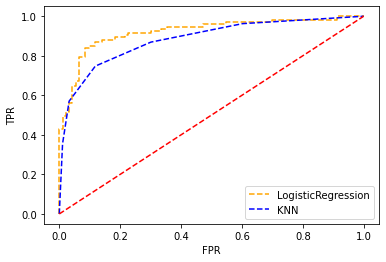

In [43]:
plt.plot(fpr_lr, tpr_lr, linestyle='--', color='orange', label='LogisticRegression')
plt.plot(fpr_kn, tpr_kn, linestyle='--', color='blue', label='KNN')
plt.plot(fpr_rn, tpr_rn, linestyle='--', color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')

In [1]:
3 * [100, 200, 150]

[100, 200, 150, 100, 200, 150, 100, 200, 150]

In [3]:
1000 / (3 * [100, 150, 200])

TypeError: unsupported operand type(s) for /: 'int' and 'list'